# INSTALL CUPY

In [0]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install https://github.com/kmaehashi/chainer-colab/releases/download/2018-02-06/cupy_cuda80-4.0.0b3-cp36-cp36m-linux_x86_64.whl
!pip install 'chainer==4.0.0b3'
!curl https://colab.chainer.org/install | sh -

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1379  100  1379    0     0   3727      0 --:--:-- --:--:-- --:--:--  3716
+ apt -y -q install cuda-libraries-dev-9-2
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-9-2 is already the newest version (9.2.148-1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
+ pip install -q cupy-cuda92  chainer 
+ set +ex
Installation succeeded!


# SETUP SECTION

In [0]:
import cupy as cp
import numpy as np
import numpy 
import sys
import keras
import matplotlib.pyplot as plt
from google.colab import drive

In [0]:
drive.mount('/content/drive')
sys.path.append('drive/My Drive/Colab Notebooks/Asgmt_ML_CNN/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **FUNCTION FOR READING MNIST DATA FROM FILE **


In [0]:
train_images_path = 'drive/My Drive/Colab Notebooks/Asgmt_ML_CNN/data/train-images'
train_labels_path = 'drive/My Drive/Colab Notebooks/Asgmt_ML_CNN/data/train-labels'
test_images_path = 'drive/My Drive/Colab Notebooks/Asgmt_ML_CNN/data/t10k-images'
test_label_path = 'drive/My Drive/Colab Notebooks/Asgmt_ML_CNN/data/t10k-labels'

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))       
        return numpy.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def load_mnist_data():
  train_data = [read_idx(train_images_path), read_idx(train_labels_path)]
  test_data = [read_idx(test_images_path), read_idx(test_label_path)]
  return train_data, test_data

# LOAD DATA AND VISUALIZE 

In [0]:
train_data, test_data = load_mnist_data()
X_train = train_data[0]
y_train = train_data[1]
X_test = test_data[0]
y_test = test_data[1]

# X_train = cp.array(X_train)
# y_train = cp.array(y_train)
# X_test = cp.array(X_test)
# y_test = cp.array(y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


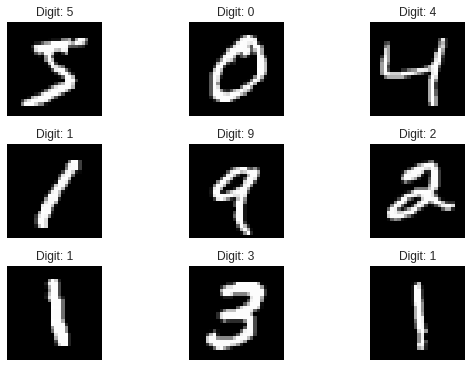

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

#RESIZE AND NORMALIZE 

In [0]:
img_rows = 28
img_cols = 28
#if k.image_data_format() == 'channels_first':
X_train_norm = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test_norm = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)
# else:

# X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
# X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
# input_shape = (img_rows, img_cols, 1)

X_train_norm = X_train_norm.astype('float32')
X_test_norm = X_test_norm.astype('float32')
X_train_norm /= 255
X_test_norm /= 255
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28)


In [0]:
num_category = 10
y_train_norm = keras.utils.to_categorical(y_train, num_category)
y_test_norm = keras.utils.to_categorical(y_test, num_category)
print('y_train shape:', y_train_norm.shape)

y_train shape: (60000, 10)


#BUILD MODEL 

In [0]:
from keras import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#TRAIN MODEL 

In [0]:
batch_size = 128
num_epoch = 15

model_log = model.fit(
          X_train_norm, y_train_norm,
          batch_size = batch_size,
          epochs = num_epoch,
          verbose = 1,
          validation_data=(X_test_norm, y_test_norm))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.2752 - acc: 0.9163 - val_loss: 0.0657 - val_acc: 0.9793
Epoch 2/15
60000/60000 [==============================] - 10s 159us/step - loss: 0.0912 - acc: 0.9733 - val_loss: 0.0401 - val_acc: 0.9869
Epoch 3/15
60000/60000 [==============================] - 10s 159us/step - loss: 0.0683 - acc: 0.9799 - val_loss: 0.0336 - val_acc: 0.9882
Epoch 4/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.0306 - val_acc: 0.9903
Epoch 5/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.0478 - acc: 0.9858 - val_loss: 0.0299 - val_acc: 0.9902
Epoch 6/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 7/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.0370 - acc: 0.9888 - val_loss: 0.

In [0]:
score = model.evaluate(X_test_norm, y_test_norm,verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.027031571525144682
Test accuracy: 0.9923


#ACCURACY VISUALIZE

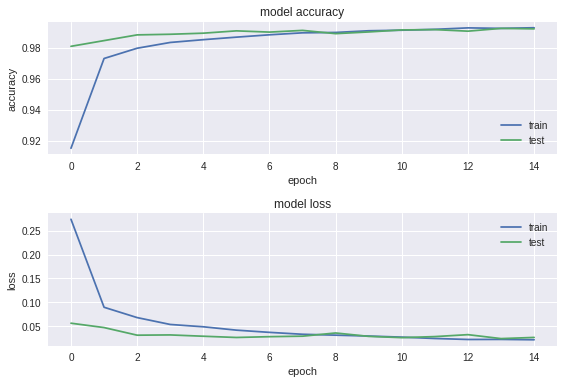

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

#SAVE MODEL

In [0]:
# model_digit_json = model.to_json()
# with open("model_digit.json", "w") as json_file:
#     json_file.write(model_digit_json)

# model.save_weights("model_digit.h5")
# print("Saved model to disk")